# TITLE : MODELS OF DENSITY FROM COMPOSITIONAL DATA MWC7+ PRESSURE TEMP USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF DENSITY USING WIDE RANGE OF COMPOSITION DATA.

THIS FILE PREAPRED SEPRATED FROM TRAINING BECAUSE TO EDIT GRAPH AND DATA TABLE USED FOR PREDICTION NEED TO MANY TIME RE RUN THIS.

TO AVOID TRINING MULTIPAL TIMES THIS IS DONE IN SEPERATED FILES. HOWEVER REVIEWER CAN CROSS VERIFY SAME TRAINED MODELS USED FOR TESTING BY MATCHING HYPER PARAMETER OPTIMIZED DURING TRAINING USED HERE OR NOT. 

ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, ANN , XGB

In [47]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score



#Model saving and loading files
import pickle
from keras.models import load_model


In [48]:
path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 3\\DATASOURCE\\"
train_file_name = "TRAIN.xlsx"
test_file_name = "TEST.xlsx"
model_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 3\\MODELS\\"
train = pd.read_excel(path+train_file_name)
test = pd.read_excel(path+test_file_name)

export_data_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 3\\EXPORTED DATA\\"

figure_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 3\\FIGURES\\"


In [49]:
test.columns

Index(['Sr.No', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+', 'MWC7+',
       'Temp', 'P', 'Density', 'Ref. Name'],
      dtype='object')

In [50]:
train.columns

Index(['Sr.No', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+', 'MWC7+',
       'Temp', 'P', 'Density'],
      dtype='object')

In [51]:
X_train = train.drop(["Density",'Sr.No'],axis = 1)
y_train = train.Density
X_test = test.drop(["Density",'Sr.No','Ref. Name'],axis = 1)
y_test = test.Density

                              #### Load Models For testing purpose  ####

In [52]:
#All File Name variable
scaler_file = 'scaler.sav'
svr_file    = 'svr_model.sav'
knn_file    = 'knn_model.sav'
xgb_file    = 'xgb_model.sav'


In [53]:
scaler            = pickle.load(open(model_path+scaler_file , "rb"))
svr_regression    = pickle.load(open(model_path+svr_file , "rb"))
knn_regression    = pickle.load(open(model_path+knn_file , "rb"))
xgb_regression    = pickle.load(open(model_path+xgb_file , "rb"))


                              #### First Scale All Inputs with scaler model  ####

In [54]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## 1. SVR MODEL

In [55]:
svr_regression_test_Prediction = svr_regression.predict(x_test)
svr_regression_train_Prediction = svr_regression.predict(x_train)


In [56]:
svr_regression_trainR2 = svr_regression.score(x_train,y_train)
svr_regression_testR2 = svr_regression.score(x_test,y_test)
print(svr_regression_trainR2 , svr_regression_testR2)

0.9813937010052093 0.9855492844102616


In [57]:
result_svr_train = pd.DataFrame()
result_svr_train["Density (train)"] = y_train
result_svr_train["Predicted Density (train)"] = svr_regression_train_Prediction
result_svr_train["Residues"] = abs(result_svr_train["Density (train)"] - result_svr_train["Predicted Density (train)"])
result_svr_train["Absolute Error (%)"] = result_svr_train["Residues"]*100/result_svr_train["Density (train)"]

result_svr_test = pd.DataFrame()
result_svr_test["Density (test)"] = y_test
result_svr_test["Predicted Density (test)"] = svr_regression_test_Prediction
result_svr_test["Residues"] = abs(result_svr_test["Density (test)"] - result_svr_test["Predicted Density (test)"])
result_svr_test["Absolute Error (%)"] = result_svr_test["Residues"]*100/result_svr_test["Density (test)"]




In [58]:
result_svr_train.describe()

,Density (train),Predicted Density (train),Residues,Absolute Error (%)
count,215.000000,215.000000,215.000000,215.000000
mean,590.833713,594.963385,16.380128,6.169402
std,204.497434,200.250684,22.550791,21.118085
min,28.600000,37.851723,0.063840,0.011089
25%,538.150000,529.420595,1.893644,0.310445
50%,625.300000,640.001062,7.719418,1.368215
75%,736.977037,746.620915,23.539660,4.388868
max,877.071303,877.168565,169.079106,204.095000


In [59]:
result_svr_test.describe()

,Density (test),Predicted Density (test),Residues,Absolute Error (%)
count,27.000000,27.000000,27.000000,27.000000
mean,511.931345,519.735408,15.764100,3.835412
std,167.533713,156.287108,12.146247,3.802496
min,305.400000,327.612549,0.853757,0.126329
25%,363.400000,370.669472,6.270079,1.414479
50%,440.500000,467.065154,13.586306,2.158621
75%,674.701496,672.778967,23.507902,5.878747
max,734.000000,745.736217,52.670603,16.117076


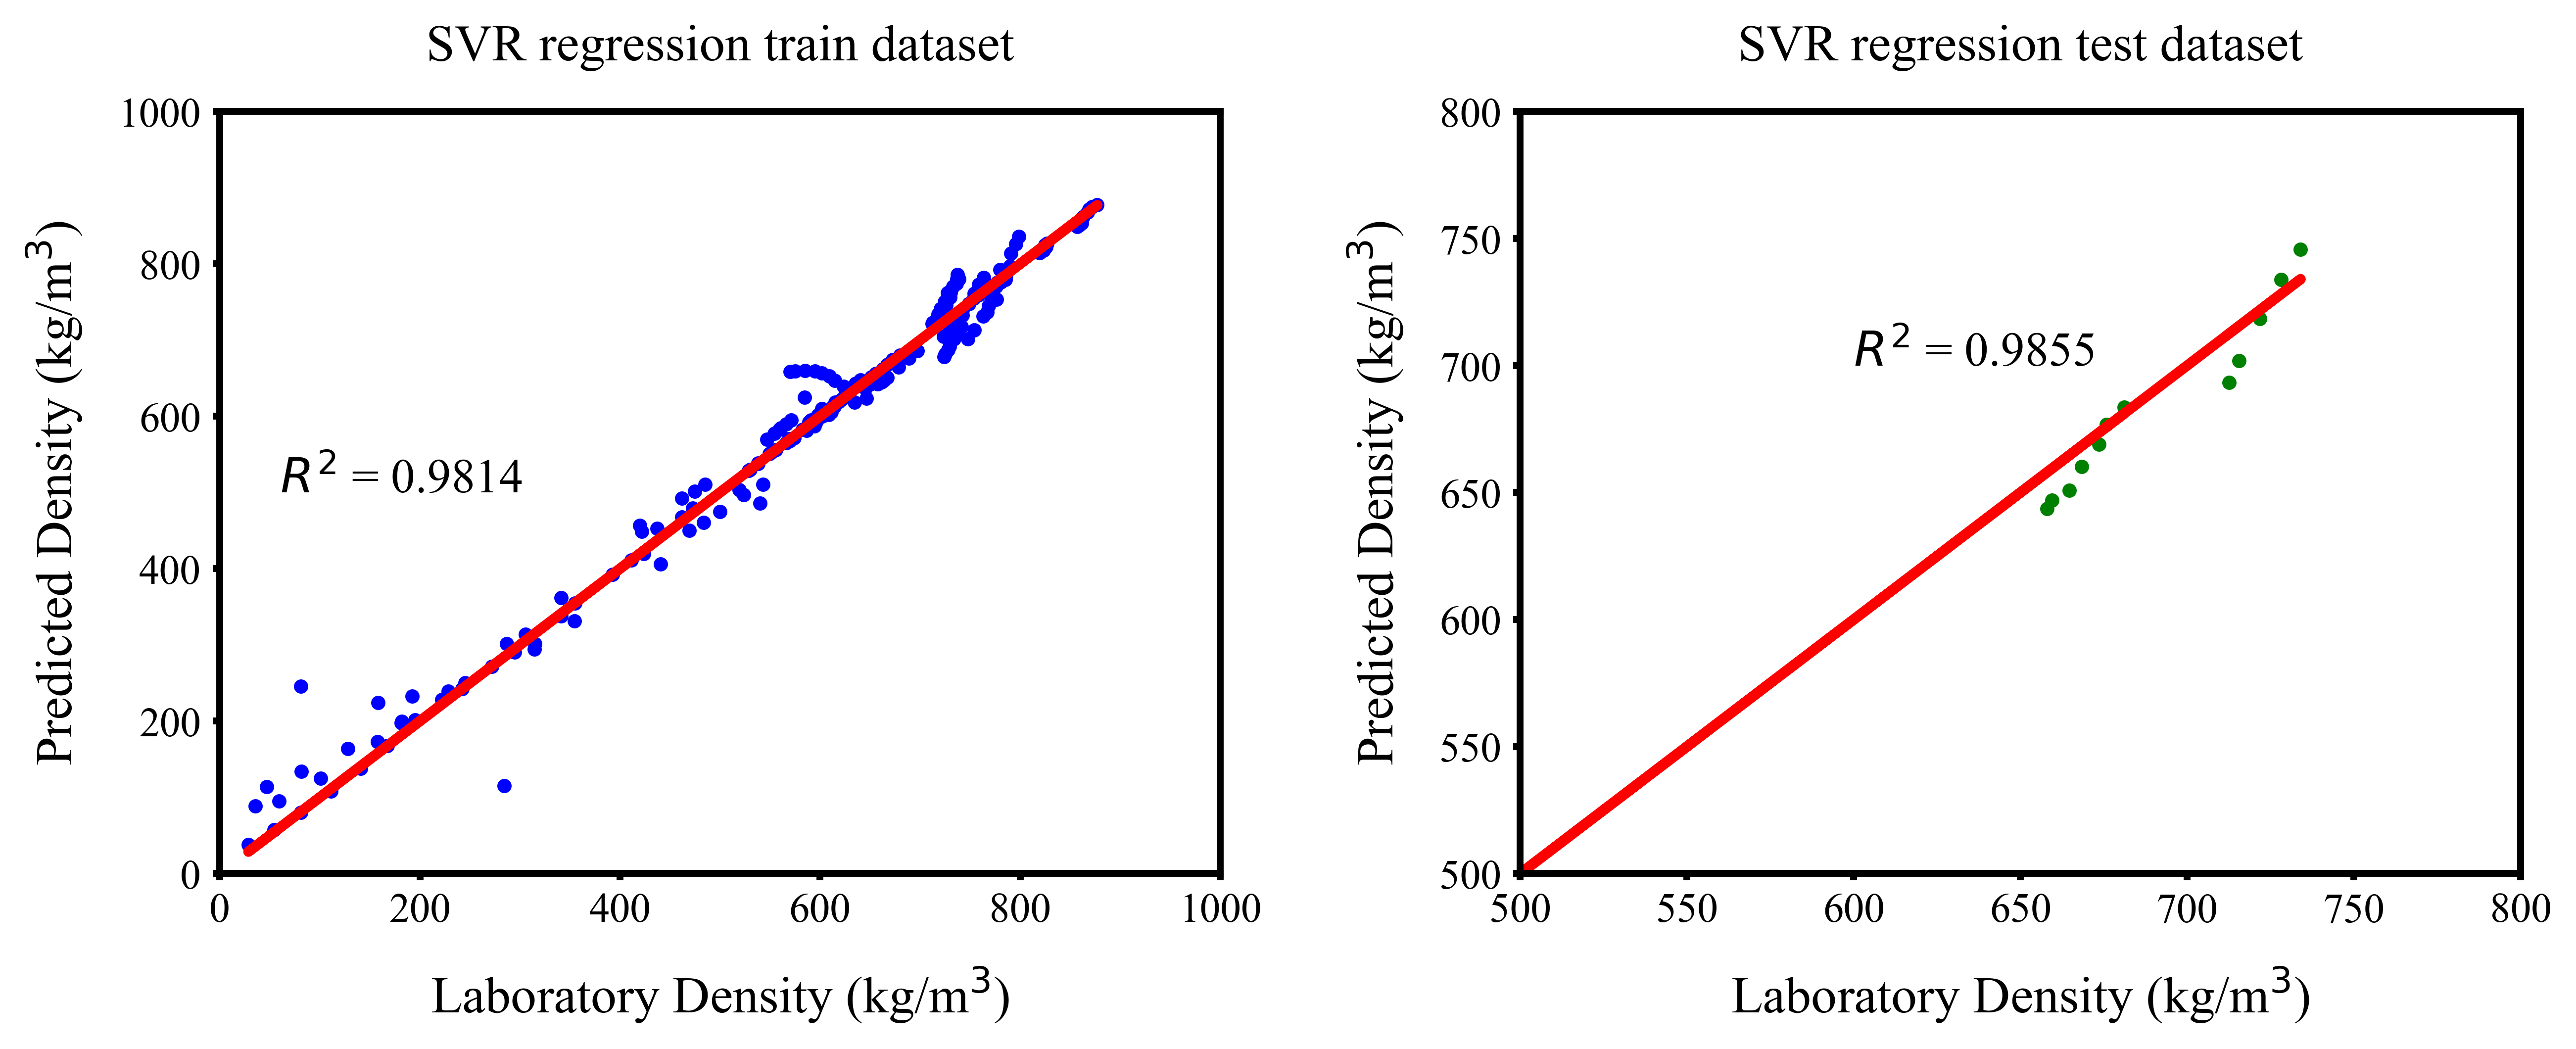

In [64]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_svr = plt.figure(figsize=(12,4) , dpi = 500)
plt.ion()
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , svr_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(svr_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

ax2 = plt.subplot(122)
plt.scatter(y_test , svr_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 600,700 , "$R^2$ = {:.4f}".format(svr_regression_testR2) , fontsize = 14)
plt.xlim((500,800))
plt.ylim((500,800))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
#fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [65]:
svr_MSE_train = mean_squared_error(y_train,svr_regression_train_Prediction)
svr_MAE_train = mean_absolute_error(y_train,svr_regression_train_Prediction)
svr_MSE_test  = mean_squared_error(y_test,svr_regression_test_Prediction)
svr_MAE_test  = mean_absolute_error(y_test,svr_regression_test_Prediction)
print(svr_MSE_train , svr_MAE_train , svr_MSE_test ,  svr_MAE_test )

774.4814750511517 16.380127803115354 390.5740302719176 15.764099813393413


## 2. KNN Model

In [66]:
knn_regression_test_Prediction = knn_regression.predict(x_test)
knn_regression_train_Prediction =knn_regression.predict(x_train)


In [67]:
knn_regression_trainR2 = knn_regression.score(x_train,y_train)
knn_regression_testR2 = knn_regression.score(x_test,y_test)
print(knn_regression_trainR2 , knn_regression_testR2)

0.9864627744954511 0.6417065877421007


In [68]:
result_knn_train = pd.DataFrame()
result_knn_train["Density (train)"] = y_train
result_knn_train["Predicted Density (train)"] = knn_regression_train_Prediction
result_knn_train["Residues"] = abs(result_knn_train["Density (train)"] - result_knn_train["Predicted Density (train)"])
result_knn_train["Absolute Error (%)"] = result_knn_train["Residues"]*100/result_knn_train["Density (train)"]

result_knn_test = pd.DataFrame()
result_knn_test["Density (test)"] = y_test
result_knn_test["Predicted Density (test)"] = knn_regression_test_Prediction
result_knn_test["Residues"] = abs(result_knn_test["Density (test)"] - result_knn_test["Predicted Density (test)"])
result_knn_test["Absolute Error (%)"] = result_knn_test["Residues"]*100/result_knn_test["Density (test)"]




In [69]:
result_knn_train.describe()

,Density (train),Predicted Density (train),Residues,Absolute Error (%)
count,215.000000,215.000000,215.000000,215.000000
mean,590.833713,589.546975,9.473065,3.892575
std,204.497434,202.090186,21.816454,14.507488
min,28.600000,54.566667,0.000000,0.000000
25%,538.150000,529.583333,0.652315,0.102504
50%,625.300000,626.501333,1.798323,0.299491
75%,736.977037,736.413622,7.528536,1.733304
max,877.071303,872.575475,231.600000,146.396966


In [70]:
result_knn_test.describe()

,Density (test),Predicted Density (test),Residues,Absolute Error (%)
count,27.000000,27.000000,27.000000,27.000000
mean,511.931345,578.430888,68.727319,17.984673
std,167.533713,136.055128,71.772566,21.065403
min,305.400000,336.833333,0.315203,0.047426
25%,363.400000,463.516667,15.169717,2.404950
50%,440.500000,596.170261,45.400000,7.654768
75%,674.701496,675.966167,94.683333,25.884026
max,734.000000,790.185999,269.370261,82.426640


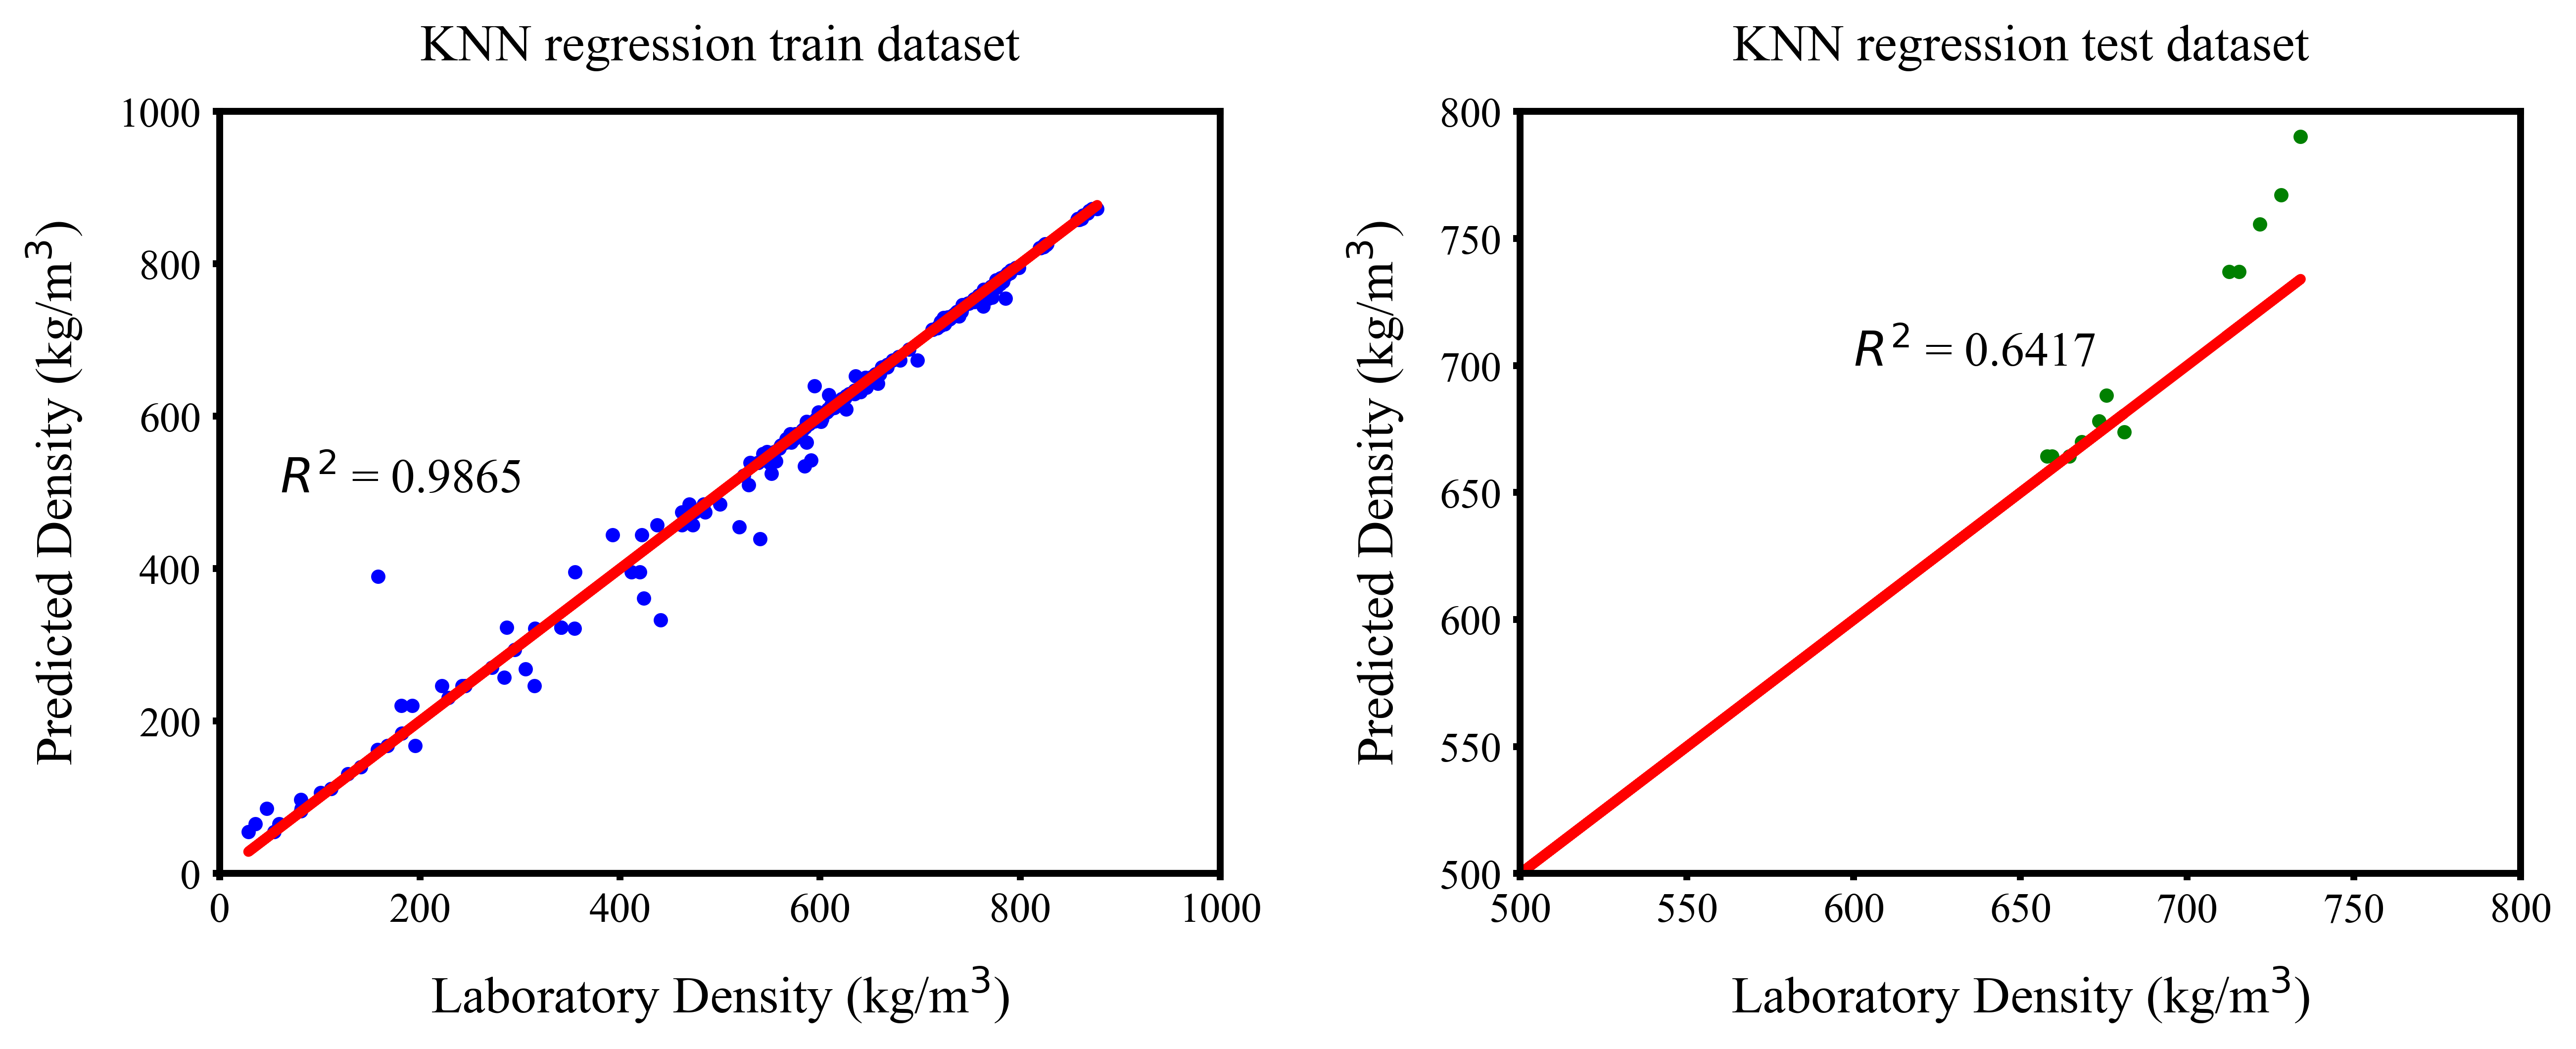

In [71]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_knn = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , knn_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(knn_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , knn_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 600,700 , "$R^2$ = {:.4f}".format(knn_regression_testR2) , fontsize = 14)
plt.xlim((500,800))
plt.ylim((500,800))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)   

#fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [72]:
knn_MSE_train = mean_squared_error(y_train,knn_regression_train_Prediction)
knn_MAE_train = mean_absolute_error(y_train,knn_regression_train_Prediction)
knn_MSE_test  = mean_squared_error(y_test,knn_regression_test_Prediction)
knn_MAE_test  = mean_absolute_error(y_test,knn_regression_test_Prediction)
print(knn_MSE_train , knn_MAE_train , knn_MSE_test , knn_MAE_test )

563.4828495338259 9.473064865709812 9683.956560934474 68.72731861842334


## 3. XGB Model

In [73]:
xgb_regression_test_Prediction = xgb_regression.predict(x_test)
xgb_regression_train_Prediction = xgb_regression.predict(x_train)


In [74]:
from sklearn.metrics import r2_score
xgb_regression_trainR2 = r2_score(y_train , xgb_regression_train_Prediction)
xgb_regression_testR2 = r2_score(y_test , xgb_regression_test_Prediction)
print(xgb_regression_trainR2 , xgb_regression_testR2)

0.9997874920976493 0.9550769200424318


In [75]:
result_xgb_train = pd.DataFrame()
result_xgb_train["Density (train)"] = y_train
result_xgb_train["Predicted Density (train)"] = xgb_regression_train_Prediction
result_xgb_train["Residues"] = abs(result_xgb_train["Density (train)"] - result_xgb_train["Predicted Density (train)"])
result_xgb_train["Absolute Error (%)"] = result_xgb_train["Residues"]*100/result_xgb_train["Density (train)"]

result_xgb_test = pd.DataFrame()
result_xgb_test["Density (test)"] = y_test
result_xgb_test["Predicted Density (test)"] = xgb_regression_test_Prediction
result_xgb_test["Residues"] = abs(result_xgb_test["Density (test)"] - result_xgb_test["Predicted Density (test)"])
result_xgb_test["Absolute Error (%)"] = result_xgb_test["Residues"]*100/result_xgb_test["Density (test)"]




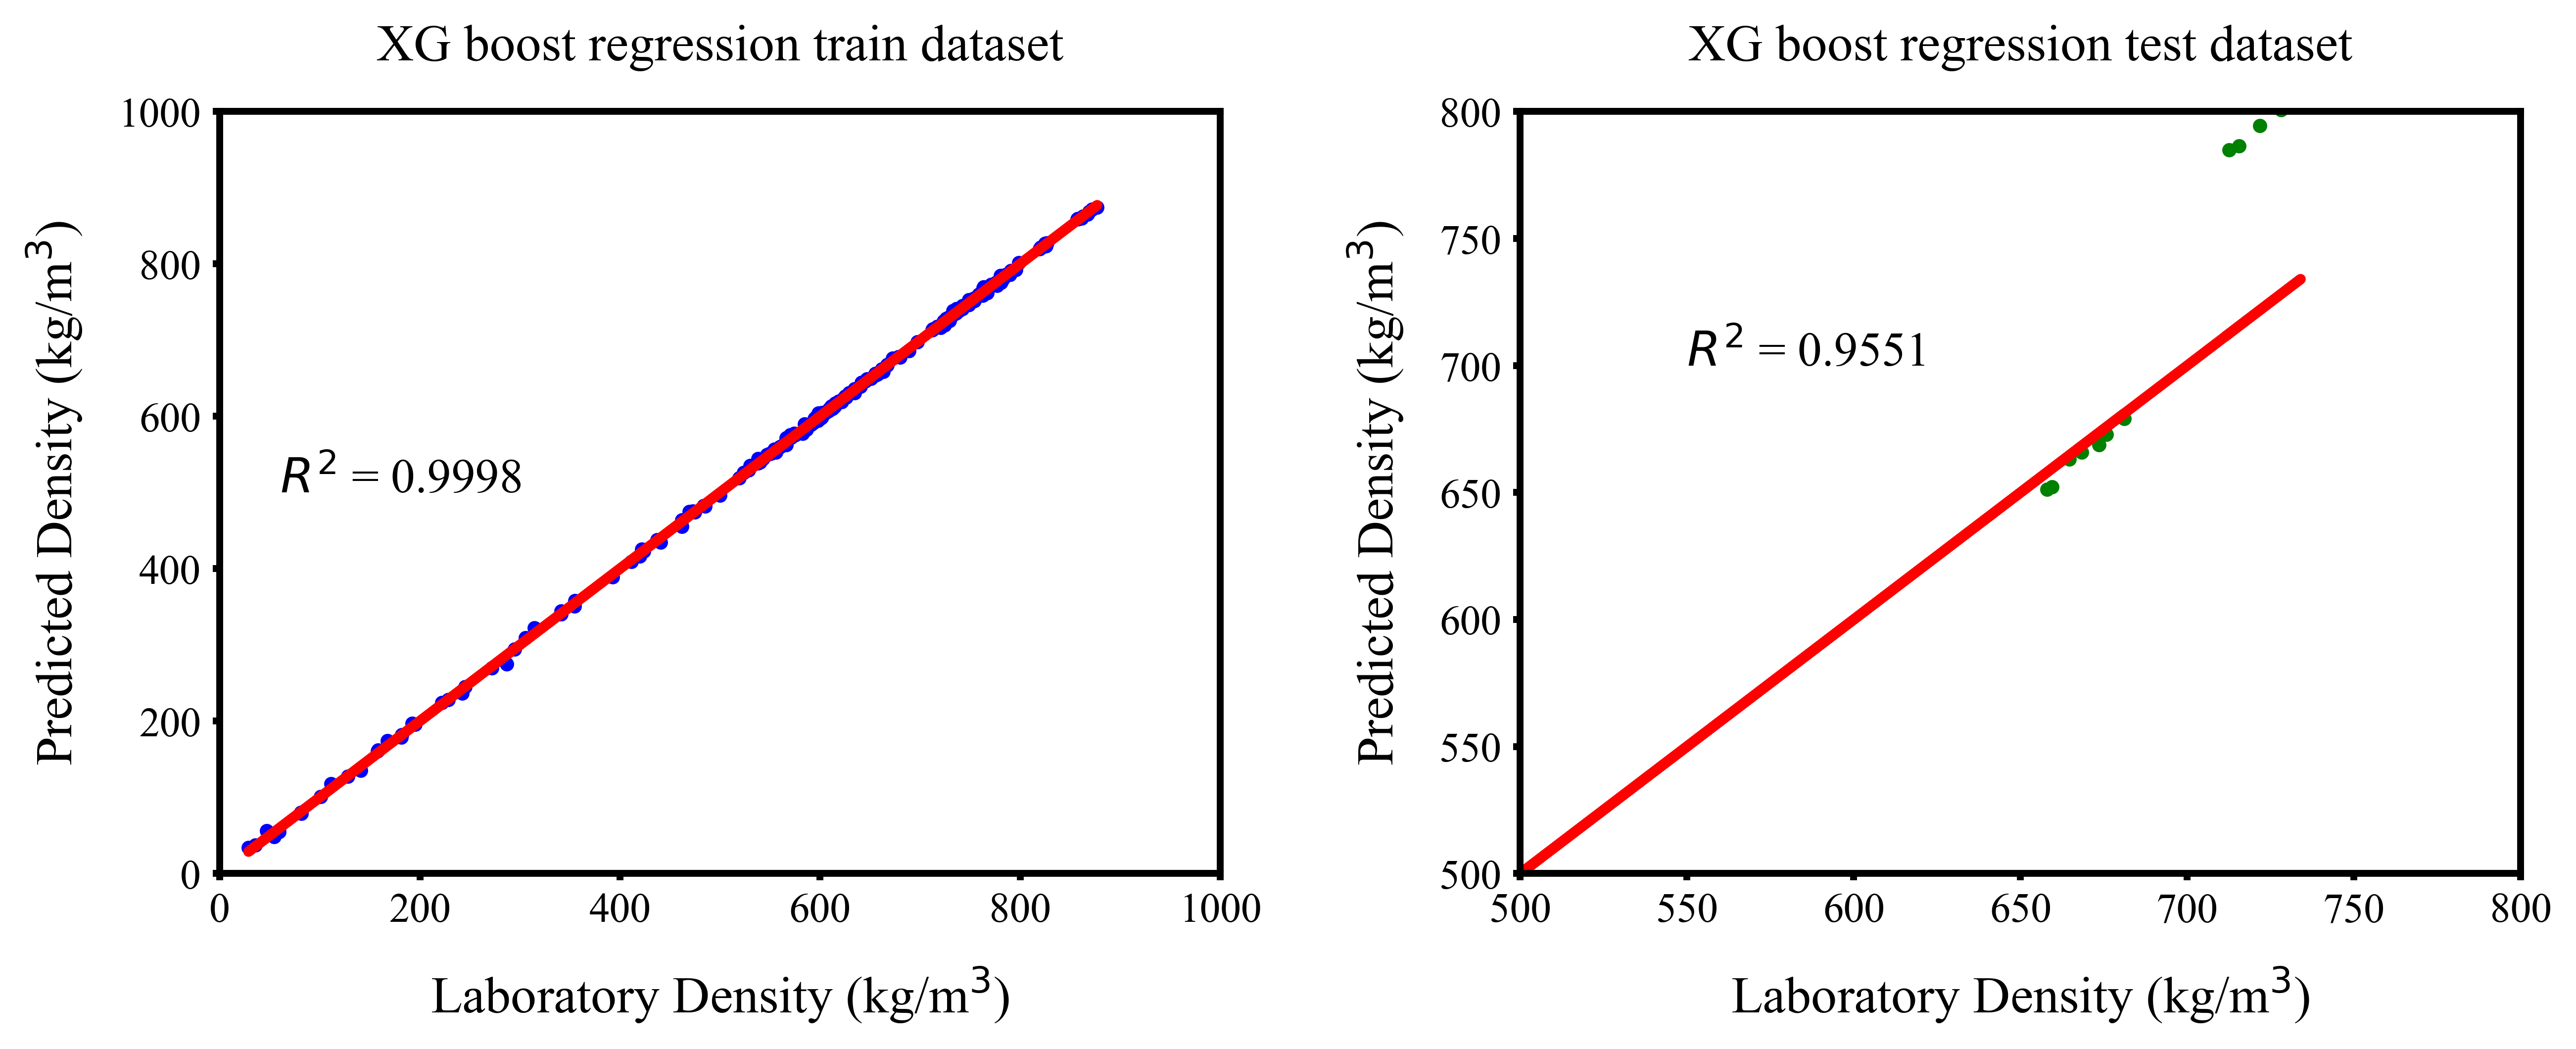

In [76]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_xgb= plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , xgb_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(xgb_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , xgb_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression test dataset" , pad = 15 , fontsize = 15)
plt.text(  550,700, "$R^2$ = {:.4f}".format(xgb_regression_testR2) , fontsize = 14)
plt.xlim((500,800))
plt.ylim((500,800))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  

#fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [77]:
xgb_MSE_train = mean_squared_error(y_train,xgb_regression_train_Prediction)
xgb_MAE_train = mean_absolute_error(y_train,xgb_regression_train_Prediction)
xgb_MSE_test  = mean_squared_error(y_test,xgb_regression_test_Prediction)
xgb_MAE_test  = mean_absolute_error(y_test,xgb_regression_test_Prediction)
print(xgb_MSE_train , xgb_MAE_train , xgb_MSE_test , xgb_MAE_test )

8.845576098646434 2.2528256805484923 1214.1812827396882 23.362255447863507


In [78]:
result_xgb_train.describe()

,Density (train),Predicted Density (train),Residues,Absolute Error (%)
count,215.000000,215.000000,215.000000,215.000000
mean,590.833713,590.830261,2.252826,0.773323
std,204.497434,204.323517,1.946271,2.108011
min,28.600000,33.639225,0.028174,0.004040
25%,538.150000,539.098053,0.609540,0.119101
50%,625.300000,624.848083,1.826892,0.275605
75%,736.977037,739.906952,3.187311,0.592519
max,877.071303,874.174927,12.048669,19.613036


In [79]:
result_xgb_test.describe()

,Density (test),Predicted Density (test),Residues,Absolute Error (%)
count,27.000000,27.000000,27.000000,27.000000
mean,511.931345,521.052856,23.362255,4.368620
std,167.533713,187.708679,26.345654,3.921604
min,305.400000,321.193665,0.448560,0.132631
25%,363.400000,352.978775,5.012879,0.866650
50%,440.500000,423.285187,10.898175,2.880829
75%,674.701496,670.870544,34.130725,8.361497
max,734.000000,813.378174,79.378174,10.814465


In [80]:
model_comp_test = pd.DataFrame({
    'Model Name' : [ 'SVM'  , 'KNN' ,"XGB"],
    'R Square' : [svr_regression_testR2 ,knn_regression_testR2,xgb_regression_testR2],
    'MSE' : [svr_MSE_test,knn_MSE_test,xgb_MSE_test],
    'MAE' : [svr_MAE_test ,knn_MAE_test,xgb_MAE_test],
    '%AAD' : [result_svr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_test.describe()["Absolute Error (%)"].loc["mean"],
             
              result_xgb_test.describe()["Absolute Error (%)"].loc["mean"]
             ]

})

In [81]:
model_comp_test

,Model Name,R Square,MSE,MAE,%AAD
0,SVM,0.985549,390.574030,15.764100,3.835412
1,KNN,0.641707,9683.956561,68.727319,17.984673
2,XGB,0.955077,1214.181283,23.362255,4.368620


In [82]:
model_comp_train = pd.DataFrame({
    'Model Name' : ['SVM' ,'KNN',"XGB"],
    'R Square' : [svr_regression_trainR2 ,knn_regression_trainR2,xgb_regression_trainR2],
    'MSE' : [svr_MSE_train , knn_MSE_train,xgb_MSE_train],
    'MAE' : [svr_MAE_train ,knn_MAE_train,xgb_MSE_train],
    '%AAD' : [result_svr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_train.describe()["Absolute Error (%)"].loc["mean"],
             result_xgb_train.describe()["Absolute Error (%)"].loc["mean"]]
})

In [83]:
model_comp_train

,Model Name,R Square,MSE,MAE,%AAD
0,SVM,0.981394,774.481475,16.380128,6.169402
1,KNN,0.986463,563.482850,9.473065,3.892575
2,XGB,0.999787,8.845576,8.845576,0.773323


In [84]:
## Final File For prediction values and graph visualization for each crude for each model

## 1. Visulization of Result with SVR

In [85]:
svr_test_result = test[["P","Density","Ref. Name","Temp"]]
svr_test_result["Density Predicted"] = result_svr_test["Predicted Density (test)"]

<ipython-input-85-108dfe06e943>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svr_test_result["Density Predicted"] = result_svr_test["Predicted Density (test)"]


In [86]:
svr_test_result.head()

,P,Density,Ref. Name,Temp,Density Predicted
0,638.3,467.7,CRUDE 1,436.1,494.484303
1,482.8,440.5,CRUDE 1,436.1,467.065154
2,344.8,401.8,CRUDE 1,436.1,429.108156
3,275.9,372.5,CRUDE 1,436.1,405.478516
4,208.6,326.8,CRUDE 1,436.1,379.470603


In [87]:
Ref_name_list = svr_test_result["Ref. Name"].unique()

In [88]:
Ref_name_list

array(['CRUDE 1', 'CRUDE 2', 'CRUDE 3', 'CRUDE 4', 'CRUDE 5', 'CRUDE 6'],
      dtype=object)

<ipython-input-89-e95d07519982>:74: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-89-e95d07519982>:74: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


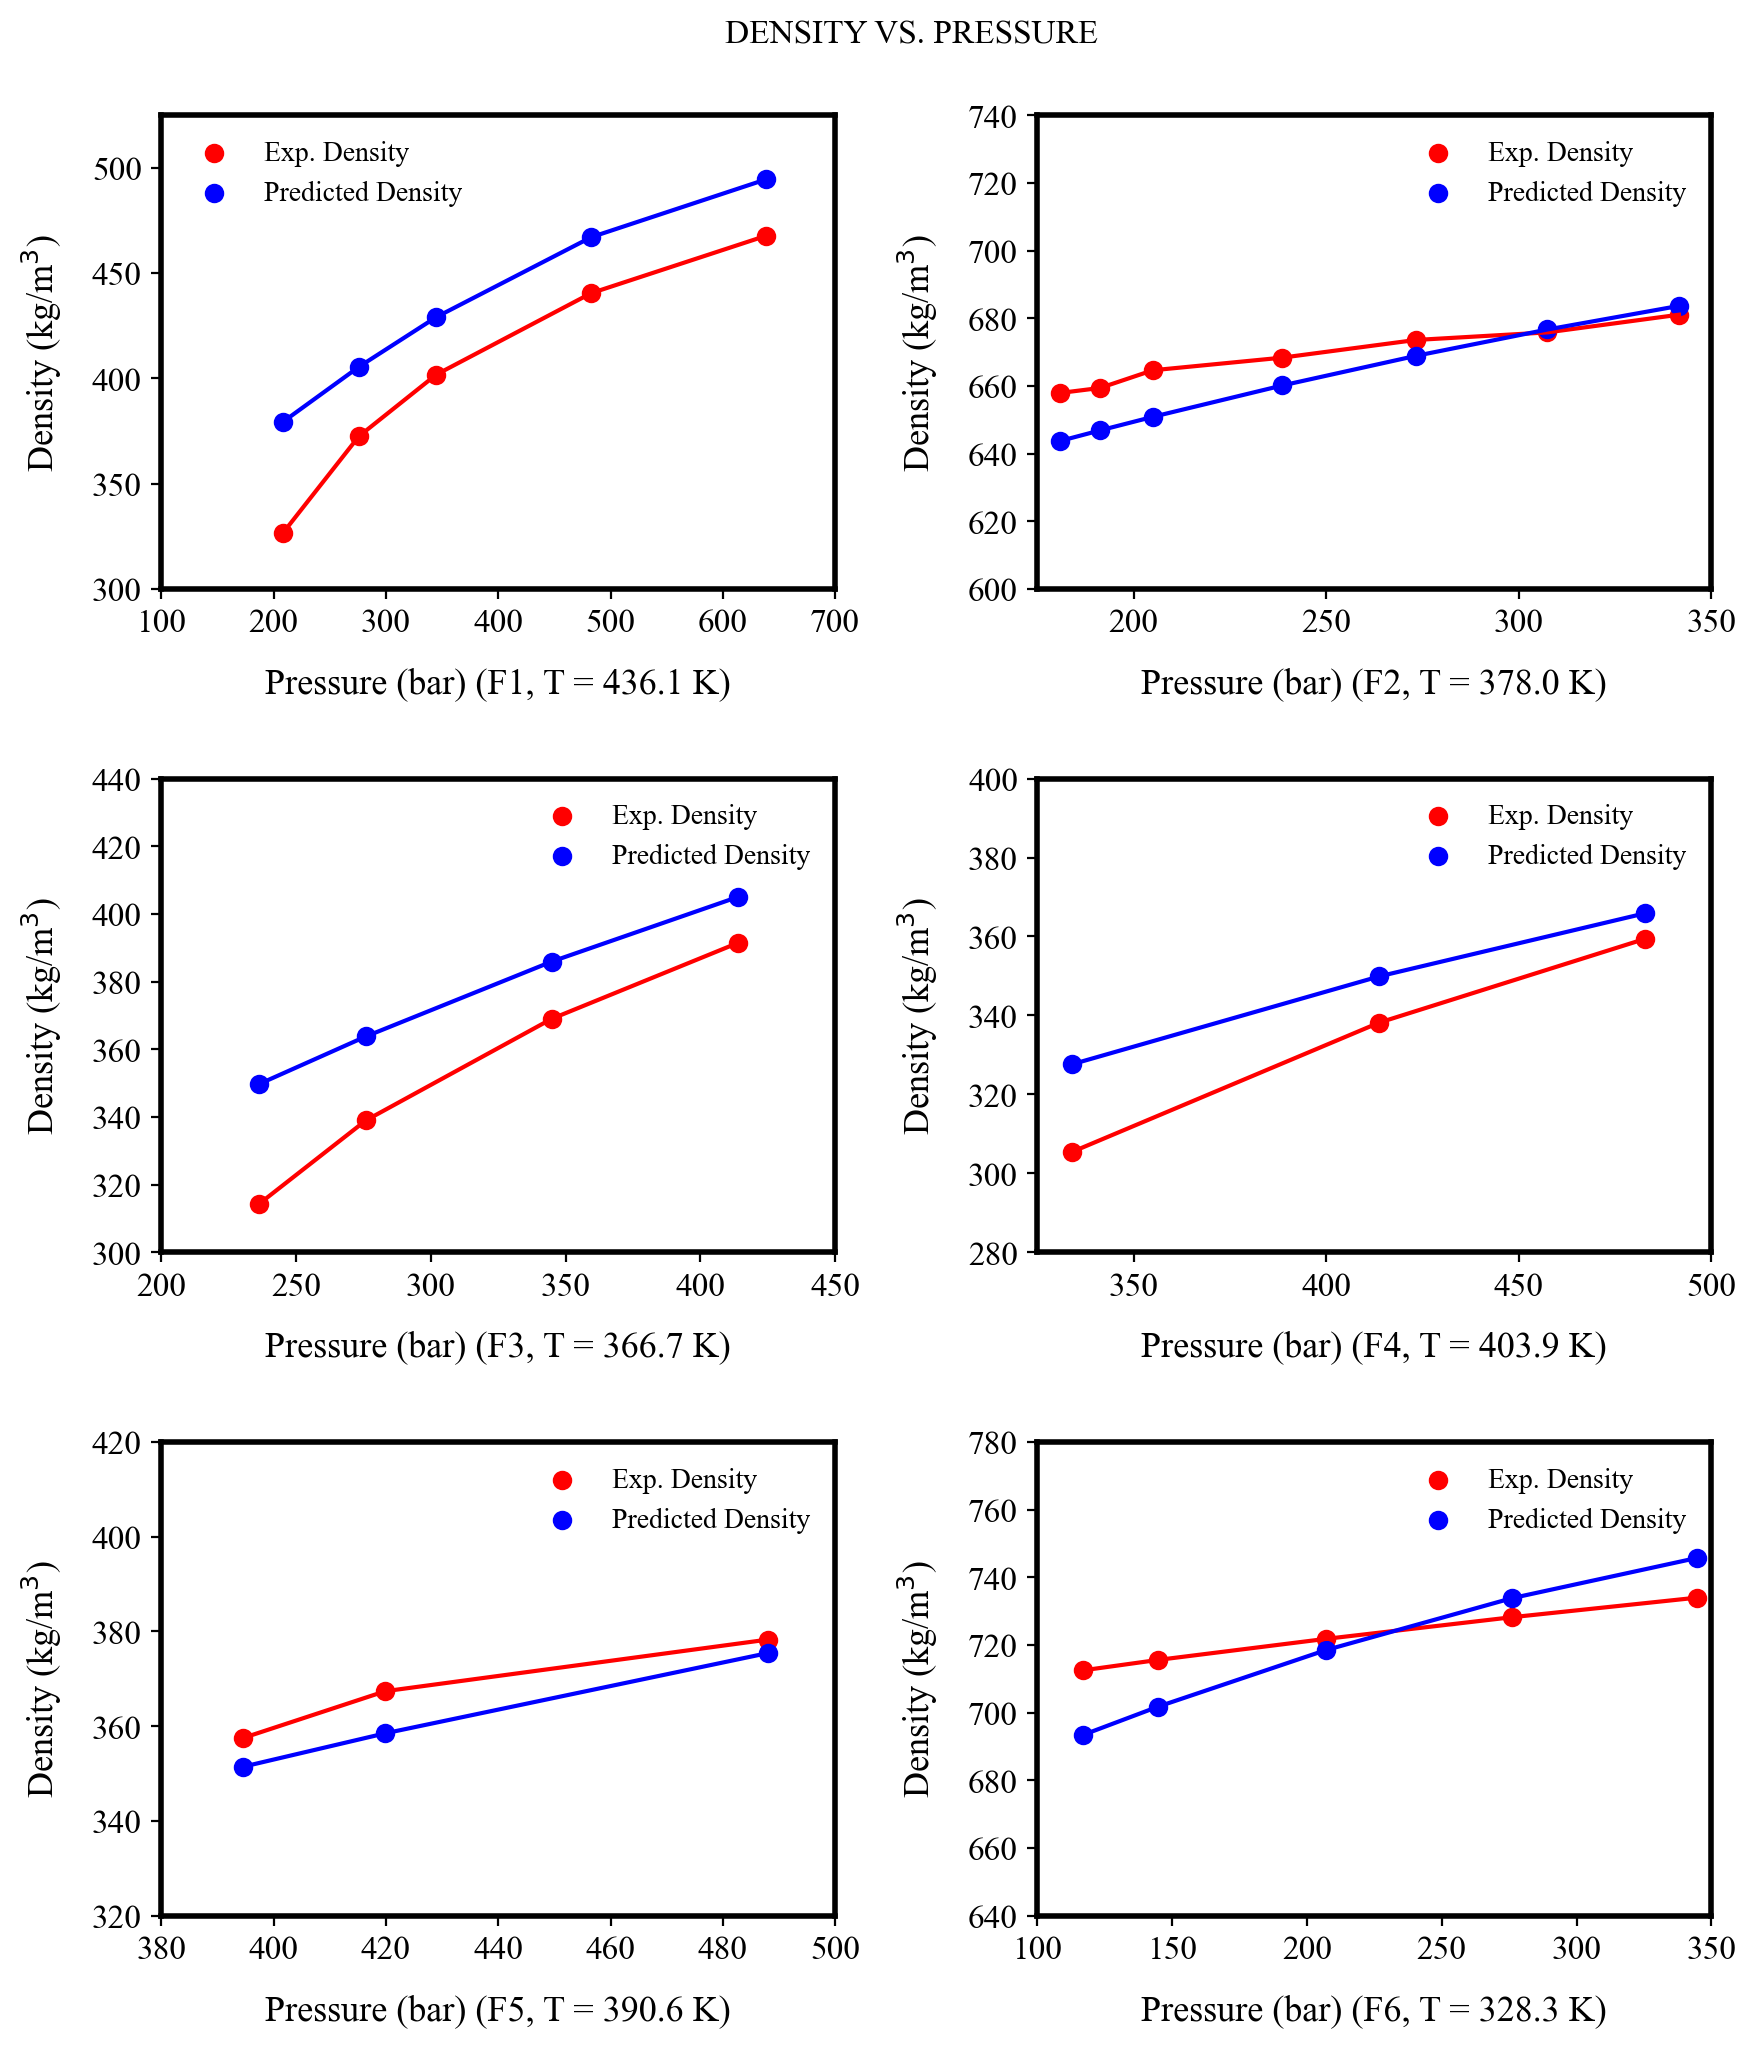

In [89]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig1 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("DENSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density"],c = "red",label = "Exp. Density")
    plt.plot(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density"],c = "red")
    plt.scatter(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue",label = "Predicted Density")
    plt.plot(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Ref. Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Density (kg/m$^{3}$)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,7,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(100,700)


ax2.set_xlim(175,350)


ax3.set_xlim(200,450)


ax4.set_xlim(325,500)


ax5.set_xlim(380,500)


ax6.set_xlim(100,350)




##Set y limit for axis ##

ax1.set_ylim(300,525)


ax2.set_ylim(600,740)


ax3.set_ylim(300,440)


ax4.set_ylim(280,400)


ax5.set_ylim(320,420)


ax6.set_ylim(640,780)



        
plt.subplots_adjust(wspace=0.3,hspace = 0.4)  

fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


## 2. Visulization of Result with KNN

In [90]:
knn_test_result = test[["P","Density","Ref. Name"]]
knn_test_result["Density Predicted"] = result_knn_test["Predicted Density (test)"]

<ipython-input-90-d6e9f48c9340>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_test_result["Density Predicted"] = result_knn_test["Predicted Density (test)"]


In [91]:
Ref_name_list = knn_test_result["Ref. Name"].unique()

<ipython-input-92-5e5f4ed44665>:74: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig2.savefig(figure_path + "knnJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-92-5e5f4ed44665>:74: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig2.savefig(figure_path + "knnJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


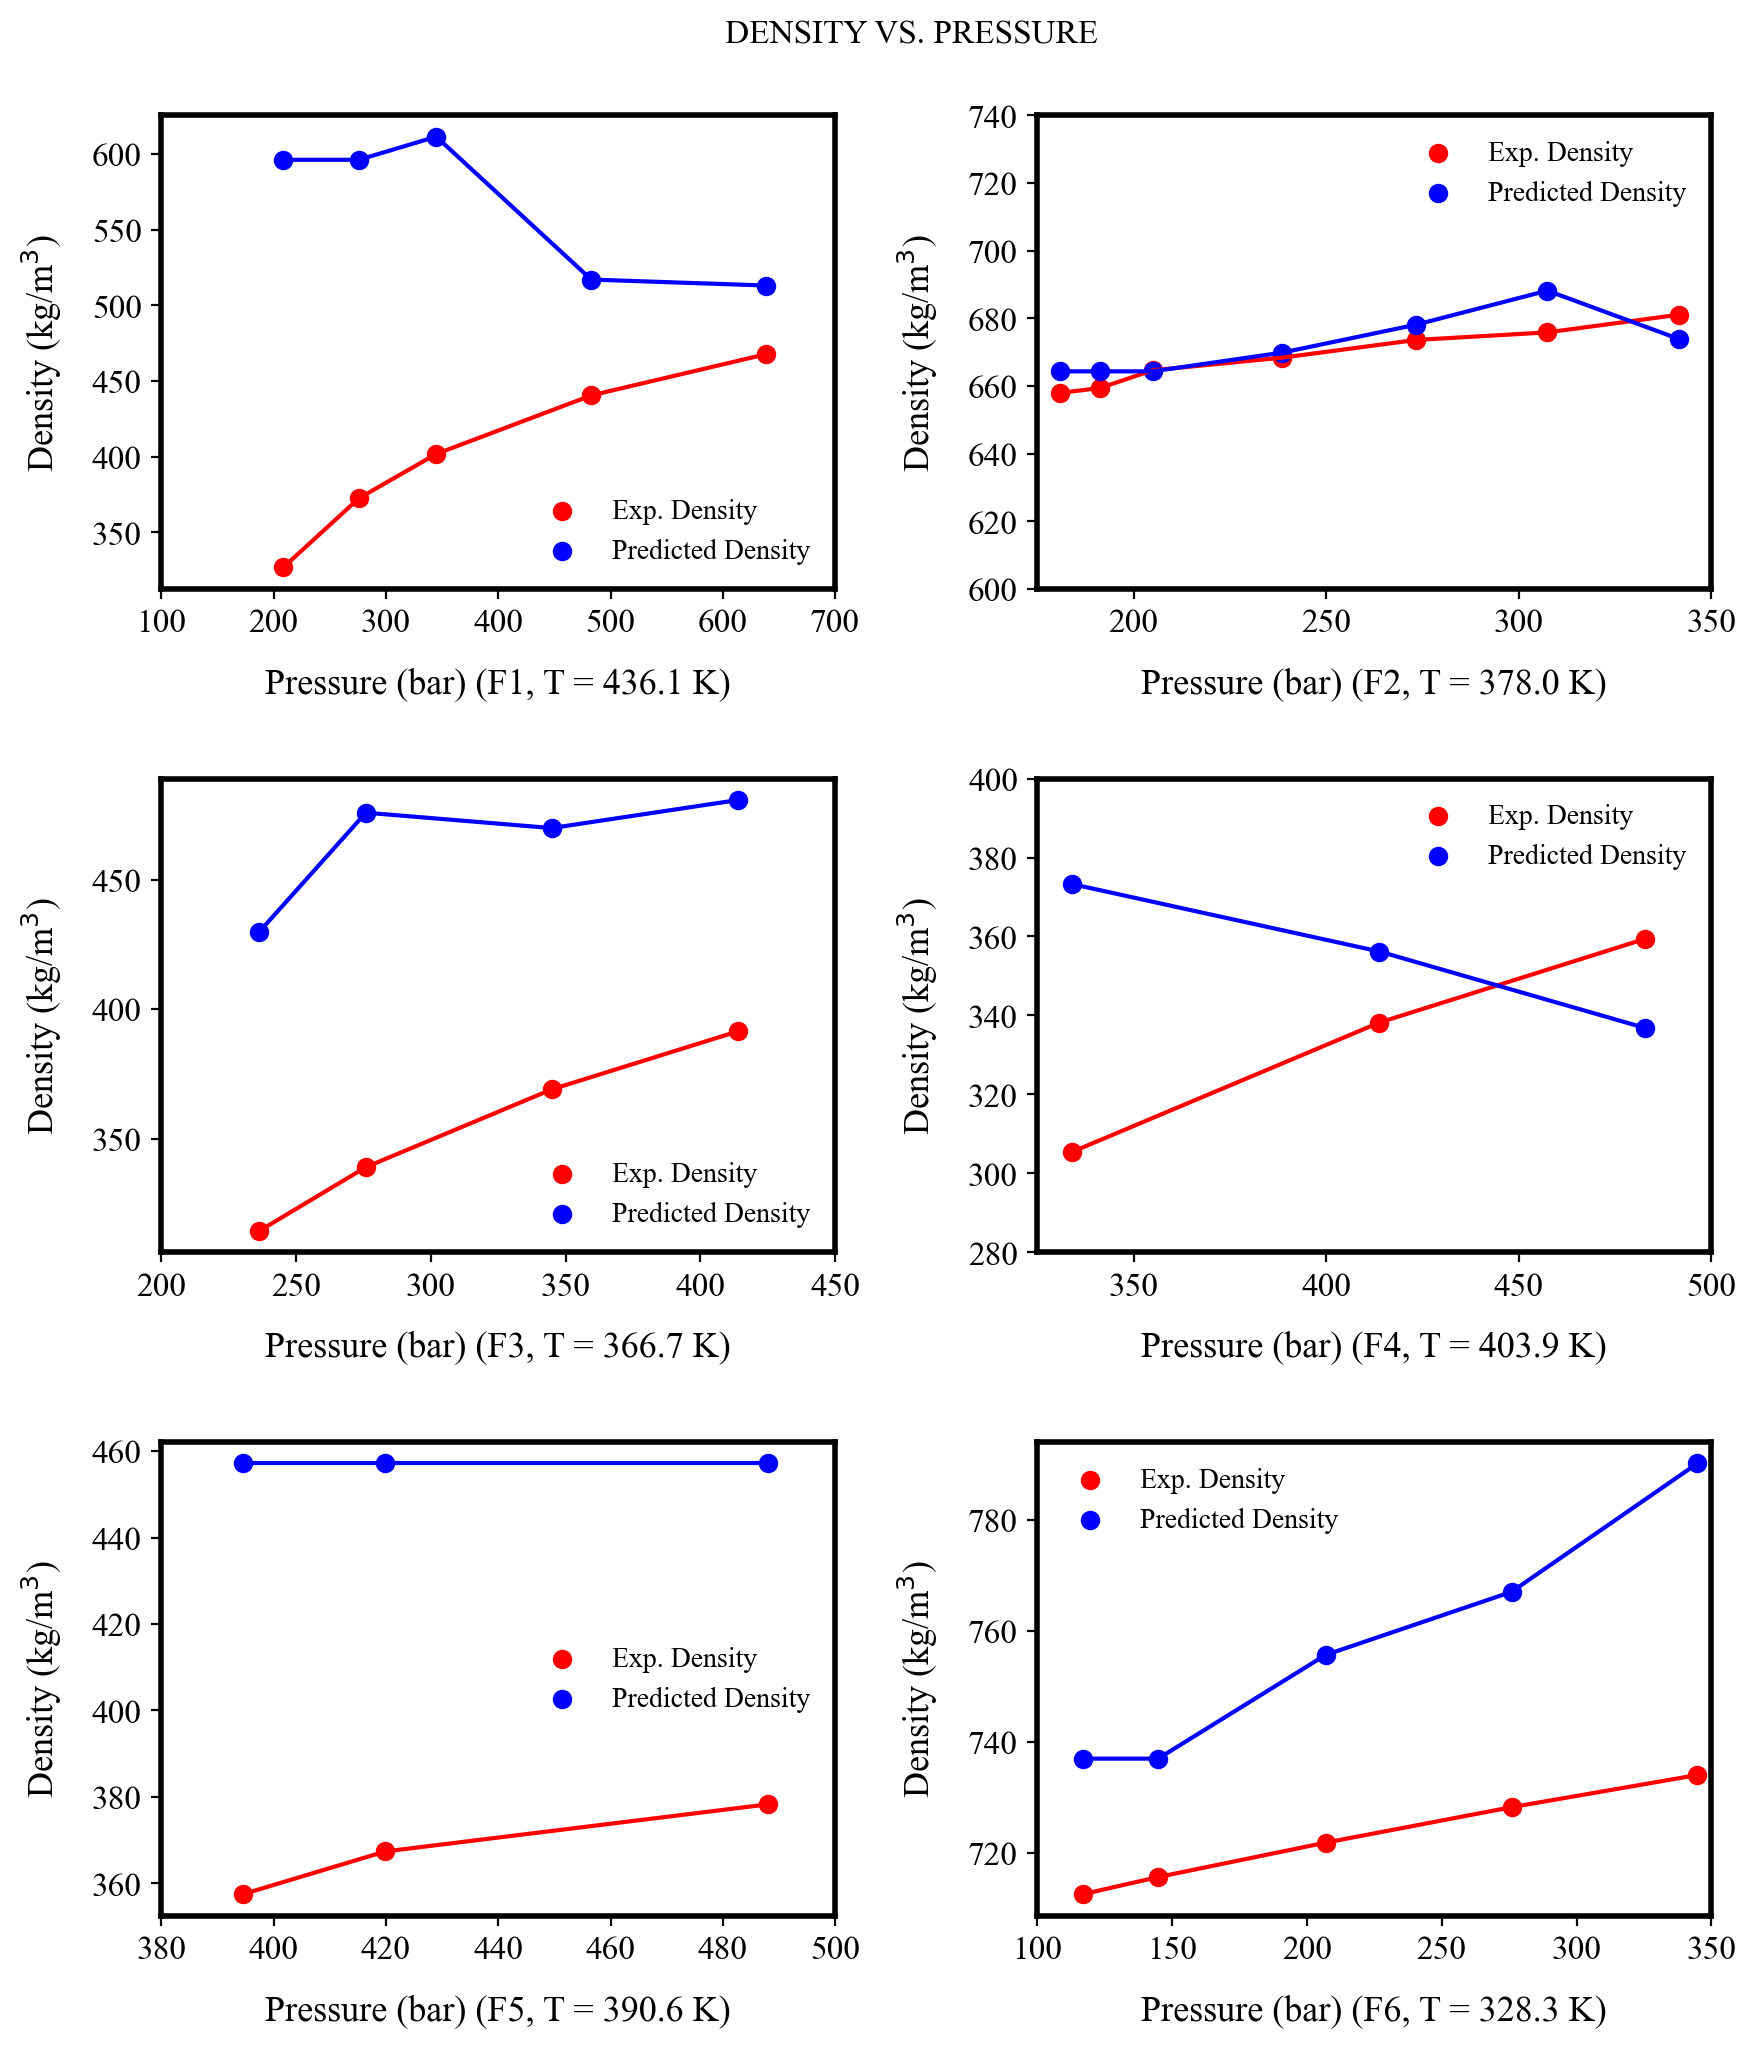

In [92]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig2 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("DENSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density"],c = "red",label = "Exp. Density")
    plt.plot(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density"],c = "red")
    plt.scatter(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue",label = "Predicted Density")
    plt.plot(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Ref. Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Density (kg/m$^{3}$)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,7,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(100,700)


ax2.set_xlim(175,350)


ax3.set_xlim(200,450)


ax4.set_xlim(325,500)


ax5.set_xlim(380,500)


ax6.set_xlim(100,350)




##Set y limit for axis ##

#ax1.set_ylim(300,525)


ax2.set_ylim(600,740)


#ax3.set_ylim(300,440)


ax4.set_ylim(280,400)


#ax5.set_ylim(320,420)


#ax6.set_ylim(640,780)



        
plt.subplots_adjust(wspace=0.3,hspace = 0.4)  

fig2.savefig(figure_path + "knnJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


## 3. Visulization of Result with XGB

In [93]:
xgb_test_result = test[["P","Density","Ref. Name"]]
xgb_test_result["Density Predicted"] = result_xgb_test["Predicted Density (test)"]

<ipython-input-93-1cb52a3d63f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_test_result["Density Predicted"] = result_xgb_test["Predicted Density (test)"]


In [94]:
Ref_name_list = xgb_test_result["Ref. Name"].unique()

<ipython-input-95-56864acc1bbc>:74: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig3.savefig(figure_path + "xgbjubart.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-95-56864acc1bbc>:74: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig3.savefig(figure_path + "xgbjubart.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


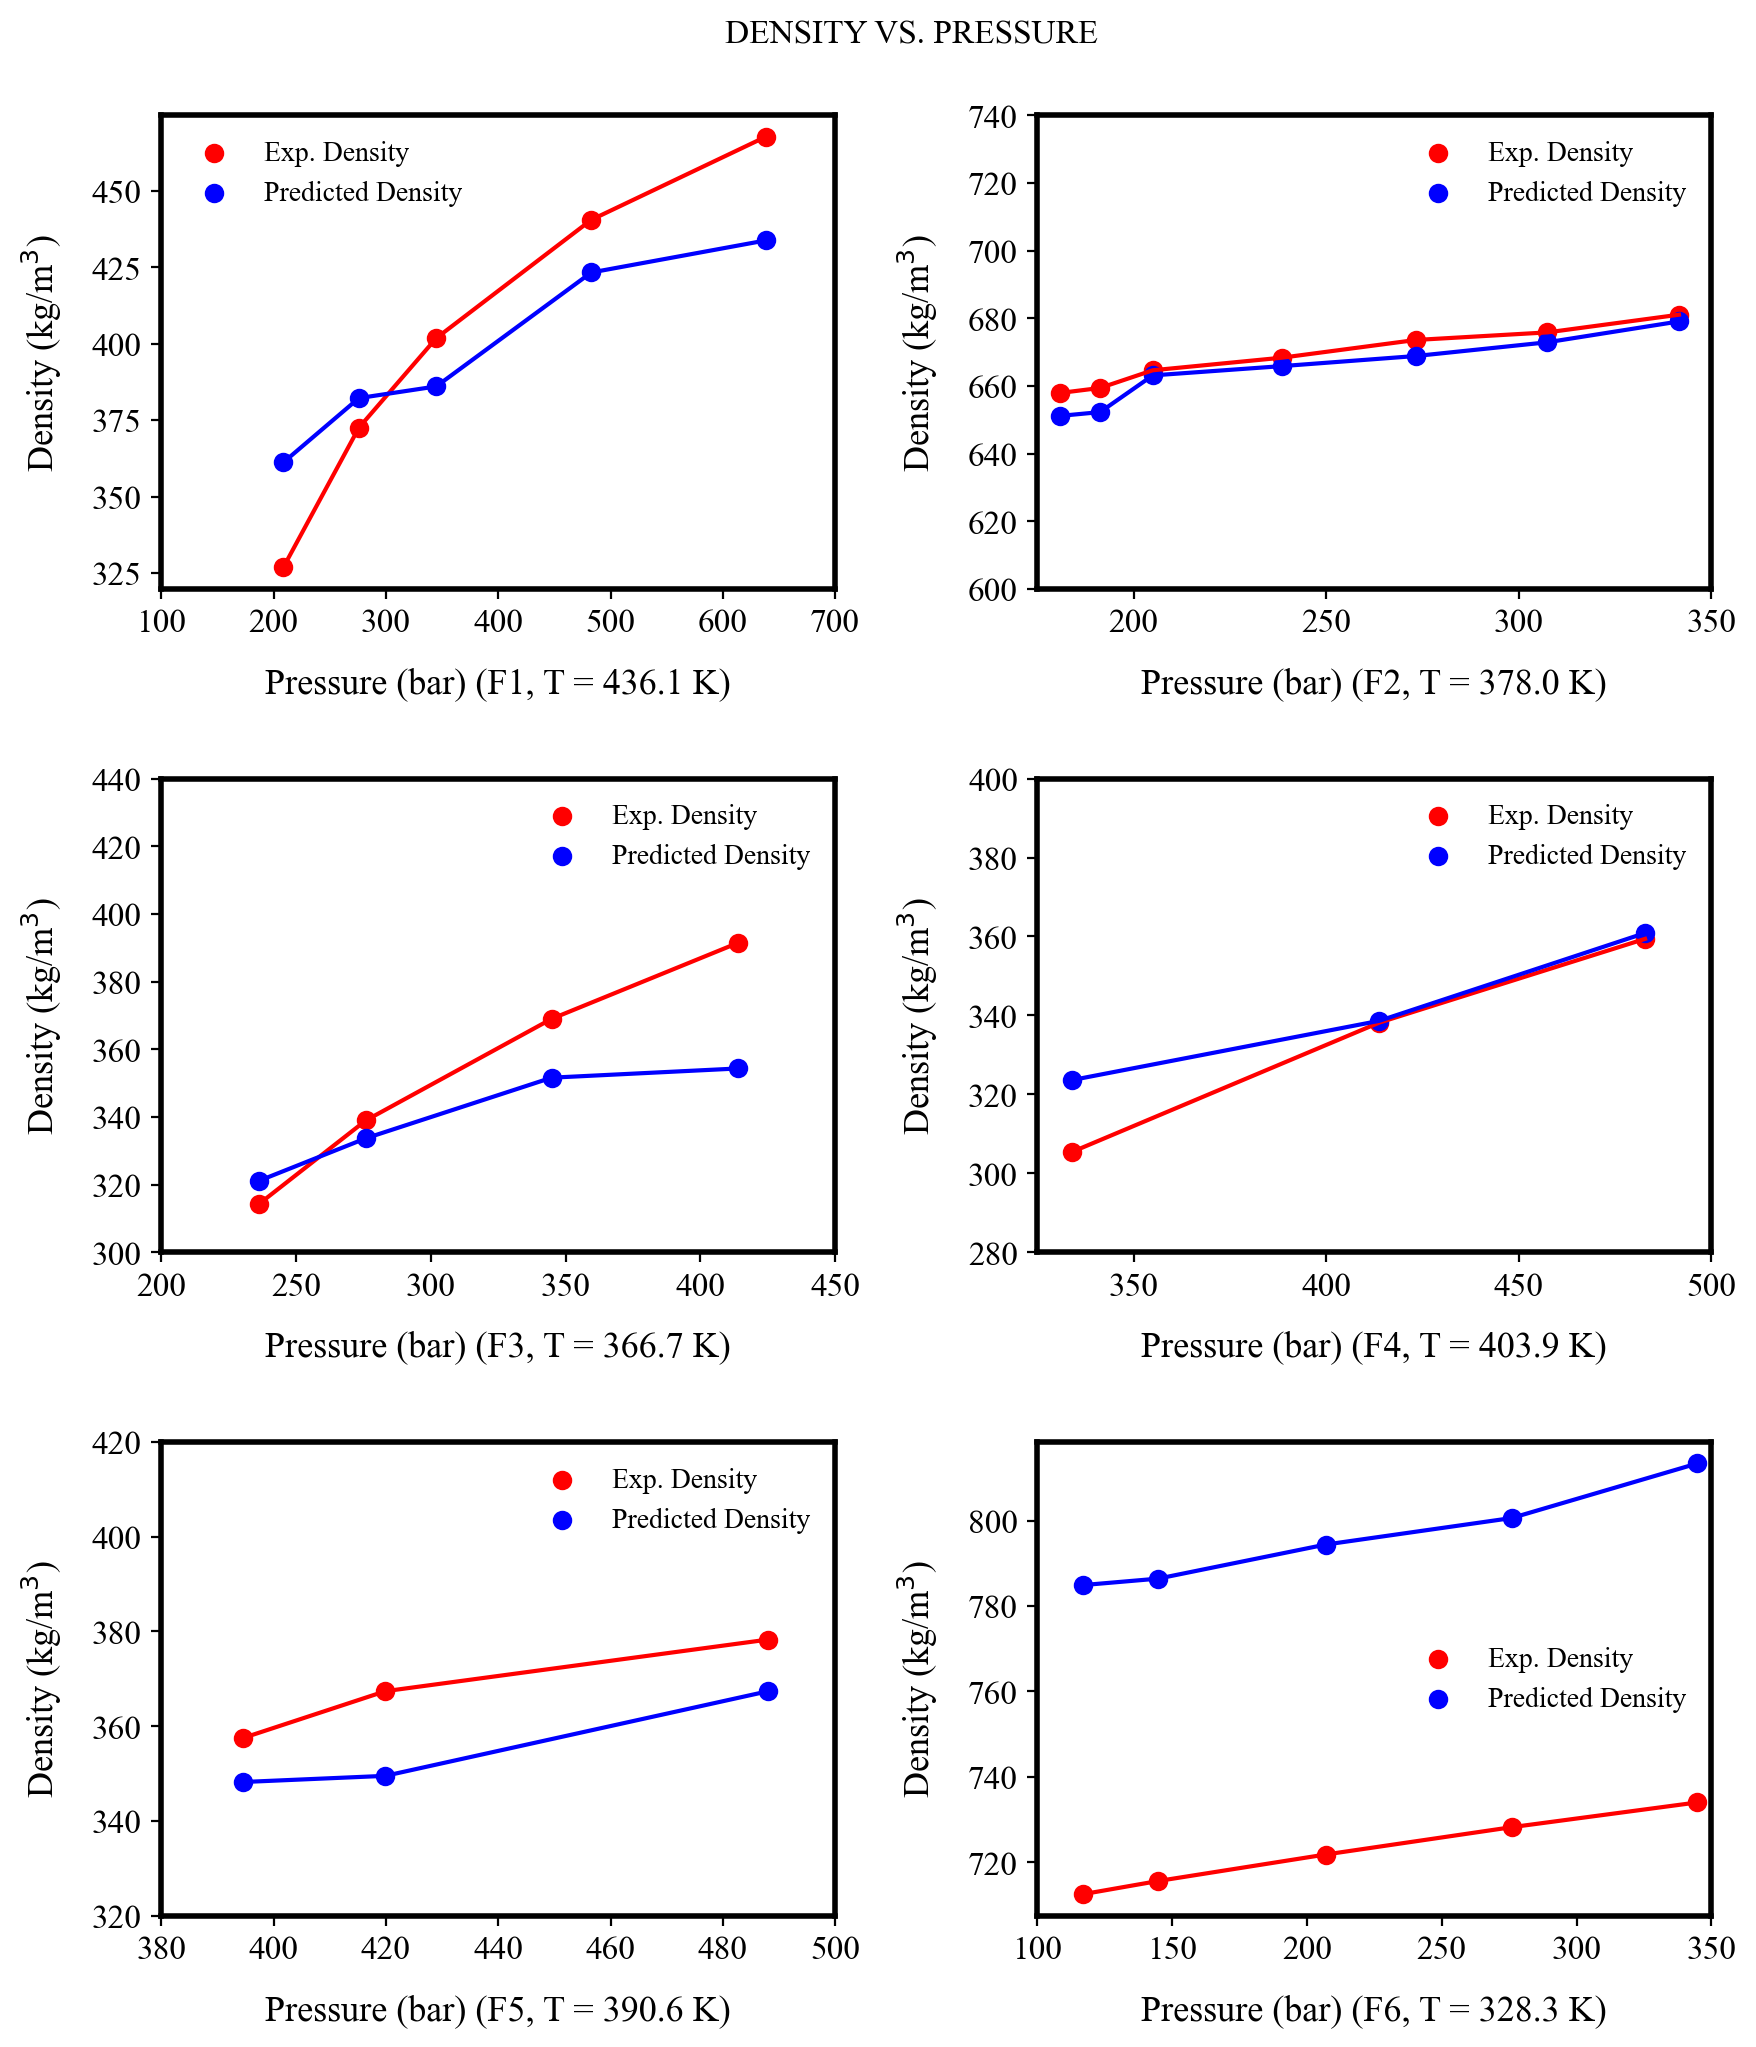

In [95]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig3 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("DENSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density"],c = "red",label = "Exp. Density")
    plt.plot(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density"],c = "red")
    plt.scatter(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue",label = "Predicted Density")
    plt.plot(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Ref. Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Density (kg/m$^{3}$)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,7,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(100,700)


ax2.set_xlim(175,350)


ax3.set_xlim(200,450)


ax4.set_xlim(325,500)


ax5.set_xlim(380,500)


ax6.set_xlim(100,350)




##Set y limit for axis ##

#ax1.set_ylim(300,525)


ax2.set_ylim(600,740)


ax3.set_ylim(300,440)


ax4.set_ylim(280,400)


ax5.set_ylim(320,420)


#ax6.set_ylim(640,780)



        
plt.subplots_adjust(wspace=0.3,hspace = 0.4)  

fig3.savefig(figure_path + "xgbjubart.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
